In [41]:
import pandas as pd
import numpy as np
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Descriptors
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem import rdMolDescriptors

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

import os

def smiles2inchi(smiles):
    return Chem.MolToInchi(Chem.MolFromSmiles(smiles))

In [2]:
jnatprod = pd.read_csv('data/entities_img_dataframe_jnatprod.tsv', sep='\t')
metabo = pd.read_csv('data/entities_img_dataframe_metabo.tsv', sep='\t')
phytorev = pd.read_csv('data/entities_img_dataframe_phytorev.tsv', sep='\t')
qn = pd.read_csv('data/entities_img_dataframe_qn.tsv', sep='\t')
chrom_a = pd.read_csv('data/entities_img_dataframe_chroma_a.tsv', sep='\t')
chrom_b = pd.read_csv('data/entities_img_dataframe_chroma_b.tsv', sep='\t')

comp = pd.concat([jnatprod, metabo, phytorev,
                  qn, chrom_a, chrom_b])

comp = comp[~comp.standardInChIKey.duplicated()]
comp.reset_index(drop=True, inplace=True)

inchi = []
for i in comp.index:
    if comp.loc[i, 'smiles']!='' and type(comp.loc[i, 'standardInChI'])==float:
        try:
            inchi.append(smiles2inchi(comp.loc[i, 'smiles']))
        except:
            inchi.append('')


comp.loc[(comp.loc[i, 'smiles']!='') & (comp['standardInChI'].isna()), 'standardInChI'] = inchi

nms=[x[0] for x in Descriptors._descList]
nms = ['MolLogP', 'ExactMolWt', 'MolMR']
mols = [Chem.MolFromInchi(x) for x in comp['standardInChI']]
calc = MoleculeDescriptors.MolecularDescriptorCalculator(nms)
descrs = [calc.CalcDescriptors(x) for x in mols]
descrs = pd.DataFrame(descrs, columns=nms)

descrs.index = comp['standardInChIKey']
classes = pd.read_csv('data/npmine_classes.tsv', sep='\t')
classes.set_index('inchikey', inplace=True)
classes.index.name = 'id'
classes = classes[~classes.index.isnull()]

descrs = descrs[descrs.index.isin(classes.index)]
descrs = descrs.apply(lambda a: (a-a.mean())/a.std())

/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (1,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
RDKit ERROR: [16:42:26] Explicit valence for atom # 38 C, 5, is greater than permitted
RDKit WARNING: [16:42:26] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:26] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:26] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:26] WARNING: Accepted unusual valence(s): Ho(1); Metal was disconnected
RDKit WARNING: [16:42:26] WARNING: Accepted unusual valence(s): Ho(1); Metal was disconnected
R

RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [

RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:27] WARNING: Omitt

RDKit WARNING: [16:42:28] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:28] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:28] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:28] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:28] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:28] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:28] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:28] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:28] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:28] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:28] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:28] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:28] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:28] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:28] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:28] WARNING: Accep

RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Omitte

RDKit ERROR: [16:42:29] WARNING: Omitt[16:42:29] Explicit valence for atom # 30 N, 5, is greater than permitted
RDKit WARNING: ed undefined stereo
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:29] WARNING: Metal was disconnected
RDKit WARNING: [16:42:29] WARNING: Omitted undefined stereo
RDKit WARNING: [

RDKit WARNING: [16:42:30] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:30] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:30] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:30] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:30] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:30] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:30] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:30] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:30] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:30] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:30] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:30] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:30] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:30] WARNING: Metal was disconnected
RDKit WARNING: [16:42:30] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:30] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:30] WARNING: Omitted

RDKit WARNING: [16:42:31] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:31] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:31] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:31] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:31] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:31] WARNING: Accepted unusual valence(s): Mo,d(1); Metal was disconnected
RDKit WARNING: [16:42:31] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected
RDKit WARNING: [16:42:31] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected
RDKit WARNING: [16:42:31] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected
RDKit WARNING: [16:42:31] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:31] WARNING: Metal was disconnected
RDKit WARNING: [16:42:31] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:31] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:42:31] WARNING: Omitted undefined stereo

RDKit WARNING: [16:42:31] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:31] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:31] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:31] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:42:31] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:31] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:31] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:31] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:31] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:42:31] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:31] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:31] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:31] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:31] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:31] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:31] WARNING: Omitted undefine

RDKit WARNING: [16:42:32] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:32] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:32] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:32] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:32] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:32] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:32] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:32] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:32] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:32] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:32] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:32] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:32] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:32] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:32] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:32] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:32] WARNING: Omitted und

RDKit WARNING: [16:42:32] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:32] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:32] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:32] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:42:32] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:32] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:32] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:32] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:32] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:32] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:32] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:32] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:32] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:32] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:32] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:33] WARNING: Omitted undefined stereo
RDKit WARNING: 

RDKit WARNING: [16:42:33] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:33] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:33] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:33] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:33] WARNING: Metal was disconnected
RDKit WARNING: [16:42:33] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:33] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:42:33] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:33] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:33] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:33] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:33] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:33] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:33] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:33] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:33] WARNING: Omitted undefined stereo
RDKit WARNING: [1

RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitt

RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Metal was disconnected
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Accepted unusual valence(s): I,d(3)
RDKit WARNING: [16:42:34] WARNING: Metal was disconnected
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:34] WARNING

RDKit WARNING: [16:42:35] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:35] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:35] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:35] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:35] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:35] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:35] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:35] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:35] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:35] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:35] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:35] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:35] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:35] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:35] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:35] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:35] WARNING: Omitted

RDKit WARNING: [16:42:36] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:42:36] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:36] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:36] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:36] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:36] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:36] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:36] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:36] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:36] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:36] WARNING: Accepted unusual valence(s): Co(5); Metal was disconnected
RDKit WARNING: [16:42:36] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:36] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:36] WARNING: Accepted unusual valence(s): Rh(1); Metal was disconnected
RDKit WARNING: [16:42:36] WARNING: Omitted undefined stereo
RDKit W

RDKit WARNING: [16:42:36] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected
RDKit WARNING: [16:42:36] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:36] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:36] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:36] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:36] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:36] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:36] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:36] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:36] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:36] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:42:36] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:42:36] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:42:36] WARNING: Omitted undefine

RDKit WARNING: [16:42:37] WARNING: Accepted unusual valence(s): Hs,d(1); Metal was disconnected
RDKit WARNING: [16:42:37] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:37] WARNING: Metal was disconnected
RDKit WARNING: [16:42:37] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:37] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:37] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:37] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:42:37] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:37] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:37] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:42:37] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:37] WARNING: Accepted unusual valence(s): Cm(1); Metal was disconnected
RDKit WARNING: [16:42:37] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:37] WARNING: Omitted

RDKit WARNING: ined stereo
RDKit WARNING: [16:42:37] WARNING: Metal was disconnected
RDKit WARNING: [16:42:37] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:37] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:37] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:37] WARNING: Metal was disconnected
RDKit WARNING: [16:42:37] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:37] WARNING: Accepted unusual valence(s): Ho(1); Metal was disconnected
RDKit WARNING: [16:42:37] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:37] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:37] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:37] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:37] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:37] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:37] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:37] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:37] WARNING: Omitted u

RDKit WARNING: [16:42:38] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:42:38] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:38] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:38] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:38] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:38] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:38] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:38] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:38] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:38] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:38] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:38] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:38] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:38] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:38] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:38] WARNING: Omitted undefine

RDKit WARNING: [16:42:39] WARNING: Charges were rearranged
RDKit WARNING: [16:42:39] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:39] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:39] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:39] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:39] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:39] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:39] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:39] WARNING: Metal was disconnected
RDKit WARNING: [16:42:39] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:39] WARNING: Charges were rearranged
RDKit WARNING: [16:42:39] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:39] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected
RDKit WARNING: [16:42:39] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:39] WARNING: Omitted und

RDKit WARNING: [16:42:39] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:39] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:39] WARNING: Accepted unusual valence(s): Md(1); Metal was disconnected
RDKit WARNING: [16:42:39] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:39] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:39] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:39] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:39] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:39] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:39] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:39] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:39] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:39] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:39] WARNING: Metal was disconnected
RDKit WARNING: [16:42:39] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:39] WARNING: Omitted undefined stereo
RDKit WA

RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitt

RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Accepted unusual valence(s): Ho(1); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Accepted unusual valence(s): Ho(1); I,t(2); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Accepted unusual valence(s): Ho(1); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:40] WARNIN

RDKit ERROR: [16:42:41] WARNING: Omitted und[16:42:41] Explicit valence for atom # 9 N, 5, is greater than permitted
RDKit WARNING: efined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Metal was disconnected
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [

RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:41] WARNING: Omitted undefine

RDKit WARNING: [16:42:42] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:42] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:42] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:42] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:42] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:42] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:42] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:42] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:42] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:42] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:42] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:42] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:42] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:42] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:42] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:42] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:42] WARNING: Omitt

RDKit ERROR: [16:42:43] Explicit valence for atom # 26 O, 4, is greater than permitted
RDKit WARNING: tereo
RDKit WARNING: [16:42:43] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:43] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:43] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:42:43] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:43] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:43] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:43] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:43] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:43] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:43] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:43] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:43] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:43] WARNING: Metal was disconnected; Proton(s) added/removed
RDKit WARNING: [16:42:43] WARNING: Omitted undefined stereo
RDKit

RDKit WARNING: [16:42:43] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:43] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:43] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:43] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:43] WARNING: Accepted unusual valence(s): Ni(1); Metal was disconnected
RDKit WARNING: [16:42:43] WARNING: Metal was disconnected
RDKit WARNING: [16:42:43] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:43] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:43] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:43] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:43] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:43] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:43] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:43] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:43] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:43] WARNING: Omitted undefined stereo
RDKit WARNI

RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Metal was disconnected
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted

RDKit WARNING: 42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:44] WARNING: Omitted undefined stereo
RDKit WARNING: [16:

RDKit WARNING: G: Omitted undefined stereo
RDKit WARNING: [16:42:45] WARNING: Charges were rearranged
RDKit WARNING: [16:42:45] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:45] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:45] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:45] WARNING: Radical center type replaced: 4->2; Accepted unusual valence(s): Nd,d(1); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:45] WARNING: Metal was disconnected
RDKit WARNING: [16:42:45] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:45] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:45] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:45] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:45] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:45] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:45] WARNING: Metal was disconnected
RDKit WARNING: [16:42:45] WARNING: Omitted undefined stereo


RDKit ERROR: [16:42:46] WARNING: Omitted unde[16:42:46] Explicit valence for atom # 22 O, 4, is greater than permitted
RDKit WARNING: fined stereo
RDKit WARNING: [16:42:46] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:46] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:46] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:46] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:46] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:46] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:46] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:46] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:46] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:46] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:46] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:46] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:46] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:46] WARNING: Omitted undefined stereo
RDKit WARNING: 

RDKit WARNING: [16:42:46] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:46] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:46] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:46] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:46] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:46] WARNING: Charges were rearranged
RDKit WARNING: [16:42:46] WARNING: Charges were rearranged
RDKit WARNING: [16:42:46] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:46] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:46] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:46] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:46] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:46] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:46] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:46] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:46] WARNING: Charges were rearranged
RDKit WARNING: [16:

RDKit WARNING: [16:42:47] WARNING: Accepted unusual valence(s): Mo,d(1); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Accepted unusual valence(s): Cm(1); Md(1); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Charges were rearranged
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WA

RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:47] WARNING: Proto

RDKit WARNING: [16:42:48] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:48] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:48] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:48] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:48] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:48] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:48] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:48] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:48] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:48] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:48] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:42:48] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:48] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:48] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:48] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:48] WARNING: Omitted undefined stereo
RDKit WARNING: 

RDKit WARNING: [16:42:49] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:49] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:49] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:49] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:49] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:49] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:49] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:49] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:49] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:49] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:49] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:49] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:49] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:49] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:49] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:49] WARNING: Omitted undefined stereo
RDKit WARNING: [1

RDKit WARNING: [16:42:49] WARNING: Radical center type replaced: 4->2; Accepted unusual valence(s): U,d(1); Metal was disconnected
RDKit WARNING: [16:42:49] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:49] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:49] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:49] WARNING: Metal was disconnected
RDKit WARNING: [16:42:49] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:49] WARNING: Metal was disconnected
RDKit WARNING: [16:42:49] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:49] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:49] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:49] WARNING: Metal was disconnected
RDKit WARNING: [16:42:49] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:49] WARNING: Metal was disconnected
RDKit WARNING: [16:42:49] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:49] WARNING: Metal was disconnected; Proton(s) added/removed
RDKit WARNING:

RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Accepted unusual valence(s): Mn(1); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Accepted unusual valence(s): Mn(1); Metal was disconnected
RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit 

RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Charges were rearranged
RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Charges were rearranged
RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Accepted unusual valence(s): Si+1,d(4)
RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:50] WA

RDKit WARNING: [16:42:51] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:51] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:51] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:51] WARNING: Metal was disconnected
RDKit WARNING: [16:42:51] WARNING: Metal was disconnected
RDKit WARNING: [16:42:51] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected
RDKit WARNING: [16:42:51] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected
RDKit WARNING: [16:42:51] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected
RDKit WARNING: [16:42:51] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected
RDKit WARNING: [16:42:51] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:51] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:51] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:51] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:51] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:51] WARN

RDKit ERROR: [16:42:52] W[16:42:52] Explicit valence for atom # 18 N, 5, is greater than permitted
RDKit WARNING: ARNING: Omitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Charges were rearranged
RDKit WARNING: [16:42:52] WARNING: Charges were rearranged
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: 

RDKit ERROR: [16:42:52] WARNING: O[16:42:52] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit WARNING: mitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Metal was disconnected
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:52] WARNING: Omitted undefined stereo
RDKit WARNING: [

RDKit WARNING: [16:42:53] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:53] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:53] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:53] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:53] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:53] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:53] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:53] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:53] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:53] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:53] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:53] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:53] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:53] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:53] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:53] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:53] WARNING: Omitt

RDKit WARNING: [16:42:54] WARNING: Radical center type replaced: 4->2; Accepted unusual valence(s): U,d(1); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:54] WARNING: Accepted unusual valence(s): Os(1); Metal was disconnected
RDKit WARNING: [16:42:54] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:54] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected; Proton(s) added/removed
RDKit WARNING: [16:42:54] WARNING: Accepted unusual valence(s): Mo,d(1); Metal was disconnected
RDKit WARNING: [16:42:54] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:54] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:54] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:54] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:54] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:54] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:54] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:54] WARNING: Omitted undefined st

RDKit WARNING: d stereo
RDKit WARNING: [16:42:54] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:54] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:54] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:54] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:54] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:54] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:54] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:54] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:54] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:54] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:54] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:54] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:54] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:54] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:54] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:54] WARNING: Omitted undefined stereo
RDKit WARNING: [

RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Omitt

RDKit WARNING: [16:42:55] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Accepted unusual valence(s): Mo,d(1); Metal was disconnected
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Accepted unusual valence(s): Mo,d(1); Metal was disconnected
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:42:55] WARNING: Cha

RDKit WARNING: [16:42:56] WARNING: Accepted unusual valence(s): Mo,d(1); Metal was disconnected
RDKit WARNING: [16:42:56] WARNING: Metal was disconnected
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Metal was disconnected
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:56] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:56] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:

RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: 

RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:56] WARNING: Omitted undefined stereo
RDKit WARNING: 

RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined

RDKit WARNING: [16:42:57] WARNING: Charges were rearranged
RDKit WARNING: [16:42:57] WARNING: Charges were rearranged
RDKit WARNING: [16:42:57] WARNING: Charges were rearranged
RDKit WARNING: [16:42:57] WARNING: Charges were rearranged
RDKit WARNING: [16:42:57] WARNING: Charges were rearranged
RDKit WARNING: [16:42:57] WARNING: Charges were rearranged
RDKit WARNING: [16:42:57] WARNING: Charges were rearranged
RDKit WARNING: [16:42:57] WARNING: Charges were rearranged
RDKit WARNING: [16:42:57] WARNING: Charges were rearranged
RDKit WARNING: [16:42:57] WARNING: Charges were rearranged
RDKit WARNING: [16:42:57] WARNING: Charges were rearranged
RDKit WARNING: [16:42:57] WARNING: Charges were rearranged
RDKit WARNING: [16:42:57] WARNING: Charges were rearranged
RDKit WARNING: [16:42:57] WARNING: Charges were rearranged
RDKit WARNING: [16:42:57] WARNING: Charges were rearranged
RDKit WARNING: [16:42:57] WARNING: Charges were rearranged
RDKit WARNING: [16:42:57] WARNING: Charges were rearrang

RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:57] WARNING: Omitted undefined stereo
RDKit WARNING: 

RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Accepted unusual valence(s): Ni(4); Metal was disconnected
RDKit WARNING: [16:42:58] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [1

RDKit WARNING: [16:42:58] WARNING: Charges were rearranged
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [1

RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Accepted unusual valence(s): Mo,d(1); Metal was disconnected
RDKit WARNING: [16:42:58] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Charges were rearranged
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:58] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Omitt

RDKit WARNING: [16:42:59] WARNING: Proton(s) added/removed
RDKit WARNING: [16:42:59] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Omitte

RDKit WARNING: [16:42:59] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Accepted unusual valence(s): Cm(1); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Accepted unusual valence(s): Cm(2); Metal was disconnected
RDKit WARNING: [16:42:59] WARNING: Accepted unusual valence(s): Cm(2); Metal was disconnected
RDKit WARNING: [16:42:59] WARNING: Metal was disconnected
RDKit WARNING: [16:42:59] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Accepted unusual valence(s): Cm(2); Metal was disconnected
RDKit WARNING: [16:42:59] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Omitted undefined stereo
RDKit WARNING: [16:42:59] WARNING: Proton(s) added/removed
R

RDKit WARNING: [16:43:00] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Charges were rearranged
RDKit WARNING: [16:43:00] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Omitte

RDKit WARNING: [16:43:00] WARNING: Accepted unusual valence(s): Ni(1); Metal was disconnected; Proton(s) added/removed
RDKit WARNING: [16:43:00] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected
RDKit WARNING: [16:43:00] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:00] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected
RDKit WARNING: [16:43:00] WARNING

RDKit WARNING: [16:43:01] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:01] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:01] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:01] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:01] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:01] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:01] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:01] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:01] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:43:01] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:01] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:01] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:01] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:01] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:01] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:01] WARNING: Omitted undefined stereo
RDKit WARNING: [16

RDKit WARNING: [16:43:01] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:01] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:01] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:01] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:01] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:01] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:01] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:01] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:01] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:01] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:01] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:43:01] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:01] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:01] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:01] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:01] WARNING: Omitted undefined stereo
RDKit WARNING: [16

RDKit WARNING: [16:43:02] WARNING: Metal was disconnected
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:02] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Accepted unusual valence(s): Mo,d(1); Metal was disconnected; Omitted

RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [

RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Metal was disconnected
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Metal was disconnected; Proton(s) added/removed
RDKit WARNING: [16:43:02] WARNING: Metal was disconnected
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43

RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:02] WARNING: Charges were rearranged
RDKit WARNING: [16:43:02] WARNING: Charges were rearranged
RDKit WARNING: [16:43:02] WARNING: Charges were rearranged
RDKit WARNING: [16:43:02] WARNING: Charges were rearranged
RDKit WARNING: [16:43:02] WARNING: Charges were rearranged
RDKit WARNING: [16:43:02] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:43:02] WARNING: Charges were rearranged
RDKit WARNING: [16:43:02] WARNING: Charges were rearranged
RDKit WARNING: [16:43:03] WARNING: Charges were rearranged
RDKit WARNING: [16:43:03] WARNING: Charges were rearranged
RDKit WARNING: [16:43:03] WARNING: Charges were rearranged
RDKit WARNING: [16:43:03] WARNING: Charges were rearranged
RDKit WARNING: [16:43:03] W

RDKit WARNING: [16:43:03] WARNING: Accepted unusual valence(s): Ru(1); Metal was disconnected; Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] W

RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Accepted unusual valence(s): P-1,d(2); Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Om

RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected; Proton(s) added/removed
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Charges were rearranged
RDKit WARNING: [16:43:03] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:03] WARNING: Omitted undefined stereo
RDKit WARNING: [16

RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Accepted unusual valence(s): Mn(1); Metal was disconnected
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined s

RDKit WARNING: [16:43:04] WARNING: Accepted unusual valence(s): Ho(1); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Accepted unusual valence(s): Cm(1); Metal was disconnected
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Radical center type replaced: 4->2; Accepted unusual valence(s): U,d(1); Metal was disconnected
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNI

RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:04] 

RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Metal was disconnected; Proton(s) added/removed
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Metal was disconnected
RDKit WARNING: [16:43:05] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Charges were rearranged
RDKit WARNING: [16:43:05] WARNING: Charges were rearranged
RDKit WARNING: [16:43:05] WARNING: Charges were rearranged
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined ster

RDKit WARNING: [16:43:05] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:05] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:05] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:05] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:05] WARNING: Accepted unusual valence(s): P(6)
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Charges were rearranged
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Om

RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Metal was disconnected
RDKit WARNING: [16:43:05] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Accepted unusual valence(s): Cm(2); Metal was disconnected
RDKit WARNING: [16:43:05] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Metal was disconnected; Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNI

RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Accepted unusual valence(s): Si+1(4)
RDKit WARNING: [16:43:05] WARNING: Metal was disconnected
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Accepted unusual valence(s): Cu(3); Co(1); Metal was disconnected; Proton(s) added/removed
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:05] WARNING: Omitted undefined stereo


RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: 

RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Metal was disconnected
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted

RDKit ERROR: [16:43:06] WARNING: Omitted [16:43:06] Explicit valence for atom # 10 N, 5, is greater than permitted
RDKit WARNING: undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Accepted unusual valence(s): Si+1,d(4); Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:06] WARNING

RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Charges were rearranged
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Radical center type replaced: 4->2; Accepted unusual valence(s): U,d(1); Metal was disconnected; Proton(s) added/removed
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitte

RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Accepted unusual valence(s): S+1,d(3)
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Charges were rearranged
RDKit WARNING: [16:43:07] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:43:07] WAR

RDKit WARNING: [16:43:07] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Accepted unusual valence(s): Cn,d(1); Metal was disconnected
RDKit WARNING: [16:43:07] WARNING: Charges were rearranged; Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Metal was disconnected
RDKit WARNING: [16:43:07] WARNING: Metal was disconnected
RDKit WARNING: [16:43:07] WAR

RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:07] WARNING: Metal

RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Charges were rearranged
RDKit WARNING: [16:43:08] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefine

RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitt

RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Metal was disconnected
RDKit WARNING: [16:43:08] WARNING: Metal was disconnected
RDKit WARNING: [16:43:08] WARNING: Radical center type replaced: 4->2; Accepted unusual valence(s): U,d(1); Metal was disconnected
RDKit WARNING: [16:43:08] WARNING: Radical center type replaced: 4->2; Accepted unusual valence(s): U,d(1); Metal was disconnected; Proton(s) added/removed
RDKit WARNING: [16:43:08] WARNING: Metal was disconnected; Proton(s) added/removed
RDKit WARNING: [16:43:08] WARNING: Metal was disconnected; Proton(s) added/removed
RDKit WARNING: [16:43:08] WARNING: Metal was disconnected
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING

RDKit ERROR: [16:43:08] WARNING: Omitted u[16:43:08] Explicit valence for atom # 2 N, 5, is greater than permitted
RDKit WARNING: ndefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:08] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:08] 

RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [

RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:09] WARNING: Accepted unusual valence(s): Cm(2); Metal was disconnected
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted

RDKit WARNING: :09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Charges were rearranged
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [1

RDKit ERROR: [16:43:09] WARNING:[16:43:09] Explicit valence for atom # 1 N, 5, is greater than permitted
RDKit WARNING:  Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Charges were rearranged
RDKit WARNING: [16:43:09] WARNING: Charges were rearranged
RDKit WARNING: [16:43:09] WARNING: Metal was disconnected
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Charges were rearranged
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:09] WAR

RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [

RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Metal was disconnected
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Accepted unusual valence(s): Mo,d(1); Metal was disconnected
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit 

RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Charges were rearranged
RDKit WARNING: [16:43:10] WARNING: Accepted unusual valence(s): Si+1,d(3)
RDKit WARNING: [16:43:10] WARNING: Accepted unusual valence(s): Si+1,d(4)
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:10] WARNING: Omitted undef

RDKit ERROR: [16:43:11] WARNING: Charges were rearranged; Omitted undefined stere[16:43:11] Explicit valence for atom # 10 N, 5, is greater than permitted
RDKit WARNING: o
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:11] WARNING: Metal was disconnected
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefine

RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Accepted unusual valence(s): Mo,d(1); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Radical center type replaced: 4->2; Accepted unusual valence(s): U,d(1); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Om

RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Metal was disconnected
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Proton(s) added/removed
RDKit WARNING: [16

RDKit WARNING: re rearranged
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Metal was disconnected
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Metal was disconnected; Proton(s) added/removed
RDKit WARNING: [16:43:11] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:11]

RDKit WARNING: [16:43:12] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:12] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:4

RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Accepted unusual valence(s): Au(2); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefin

RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:12] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:12] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:12] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Metal was disconnected
RDKit WARNING: [16:43:12] WARNING: Metal was disconnected
RDKit WARNING: [16:43:12] WARNING: Radical center type replaced: 4->2; Accepted unusual valence(s): U,d(1); 

RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:12] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Metal was disconnected; Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:13] WARNING: Metal was disconnected
RDKit WARNING: [16:43:13] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:13] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:13] WARNING: Accepted unusual valence(s): Ho(1); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNIN

RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitt

RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Charges were rearranged
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Radical center type replaced: 4->2; Accepted unusual valence(s): Nd,d(1); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDK

RDKit WARNING: [16:43:13] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:13] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Metal was disconnected
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined s

RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:13] WARNING: Metal was disconnected
RDKit WARNING: [16:43:13] WARNING: Accepted unusual valence(s): Si+1,d(4)
RDKit WARNING: [16:43:13] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:14] WAR

RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Metal was disconnected
RDKit WARNING: [16:43:14] WARNING: Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WA

RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Charges were rearranged
RDKit WARNING: [16:43:14] WARNING: Charges were rearranged
RDKit WARNING: [16:43:14] WARNING: Charges were rearranged
RDKit WARNING: [16:43:14] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:

RDKit WARNING: roton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:14] WARNING: Metal was disconnected
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Proton(s) added/removed
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:14] WARNING: Omitted undefined stereo
RDKit WARNING: 

RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Metal was disconnected
RDKit WARNING: [16:43:15] WARNING: Metal was disconnected; Proton(s)

RDKit ERROR: [16:43:15] WARNING: Proton(s) added/rem[16:43:15] Explicit valence for atom # 19 O, 5, is greater than permitted
RDKit WARNING: oved
RDKit WARNING: [16:43:15] WARNING: Radical center type replaced: 4->2; Accepted unusual valence(s): U,d(1); Metal was disconnected
RDKit WARNING: [16:43:15] WARNING: Metal was disconnected
RDKit WARNING: [16:43:15] WARNING: Metal was disconnected
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Accepted unusual valence(s): Mo(2); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Accepted unusual valence(s): Mo(2); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Accepted unusual valence(s): Mo(2); Metal was disconnected; Omitted

RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Accepted unusual valence(s): Nd(4); Metal was disconnected; Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Accepted unusual valence(s): Co(1); Metal was disconnected
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Charges were rearranged; Accepted unusual valence(s): P(6)
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNING: Omitted undefined stereo
RDKit WARNING: [16:43:15] WARNIN

RDKit WARNING: [16:43:19] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:19] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:19] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:19] WARNING: not removing hydrogen atom without neighbors
RDKit ERROR: [16:43:19] ERROR: Explicit valence for atom # 2 H, 2, is greater than permitted
RDKit ERROR: [16:43:19] Explicit valence for atom # 1 Cl, 3, is greater than permitted
RDKit WARNING: [16:43:19] expect radical to be either 2 or 3 while getting . Ignore radical.
RDKit WARNING: [16:43:19] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Number; Mobile-H groups: Falsely present, Attachment points; Charge(s): Do not match; Proton balance: Does not match)
RDKit WARNING: [16:43:20] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number, Number; Mobile-H groups: Attachment points, Number; Charge(s): Do not match)
RDKit WARNING: [16:43:20] WARNING:

RDKit WARNING: [16:43:31] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number, Number; Charge(s): Do not match)
RDKit WARNING: [16:43:31] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number; Mobile-H groups: Falsely present, Attachment points)
RDKit WARNING: [16:43:31] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number; Mobile-H groups: Falsely present, Attachment points)
RDKit WARNING: [16:43:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:32] WARNING: not removing hydrogen atom without neighbors
RDKi

RDKit WARNING: [16:43:43] WARNING:  Problems/mismatches: Mobile-H( Proton balance: Does not match)
RDKit WARNING: [16:43:43] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:43] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:44] WARNING:  Problems/mismatches: Mobile-H( Charge(s): Do not match)
RDKit WARNING: [16:43:45] WARNING:  Problems/mismatches: Mobile-H( Stereobonds/cumulenes: Extra undefined)
RDKit WARNING: [16:43:45] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Number; Mobile-H groups: Missing, Attachment points; Charge(s): Do not match; Proton balance: Does not match)
RDKit WARNING: [16:43:45] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:45] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:45] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:45] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:45] WARNING:

RDKit ERROR: [16:43:54] ERROR: Explicit valence for atom # 3 Br, 3, is greater than permitted
RDKit ERROR: [16:43:55] Explicit valence for atom # 9 H, 2, is greater than permitted
RDKit WARNING: [16:43:54] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Number; Mobile-H groups: Missing, Attachment points; Charge(s): Do not match; Proton balance: Does not match)
RDKit WARNING: [16:43:55] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Number; Mobile-H groups: Falsely present, Attachment points; Charge(s): Do not match)
RDKit WARNING: [16:43:55] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Number; Mobile-H groups: Missing, Attachment points; Charge(s): Do not match)
RDKit WARNING: [16:43:55] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:55] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number, Number; Charge(s): Do not match)
RDKit WARNING: [16:43:55] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:4

RDKit WARNING: [16:43:56] WARNING:  Problems/mismatches: Mobile-H( Stereobonds/cumulenes: Extra undefined)
RDKit WARNING: [16:43:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:57] WARNING: not removing hydrogen atom without neighbors
RDKit ERROR: [16:43:56] ERROR: Explicit valence for atom # 3 Cl, 3, is greater than permitted
RDKit ERROR: [16:43:57] Explicit valence for atom # 5 Cl, 3, is greater than permitted
RDKit WARNING: [16:43:57] WARNING:  Problems/mismatches: Mobile-H( Hydro

RDKit WARNING: [16:43:58] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:58] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:58] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:58] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:58] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:58] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:58] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:58] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:58] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:58] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:58] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:58] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:43:58] WARNING: not r

RDKit WARNING: [16:44:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:44:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:44:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:44:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:44:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:44:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:44:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:44:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:44:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:44:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:44:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:44:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:44:00] WARNING: not r

RDKit ERROR: [16:44:04] ERROR: Explicit valence for atom # 8 Cl, 7, is greater than permitted
RDKit ERROR: [16:44:04] Explicit valence for atom # 15 Cl, 3, is greater than permitted
RDKit ERROR: [16:44:04] ERROR: Explicit valence for atom # 15 Cl, 3, is greater than permitted
RDKit ERROR: [16:44:04] Explicit valence for atom # 0 Cl, 3, is greater than permitted
RDKit ERROR: [16:44:04] ERROR: Explicit valence for atom # 0 Cl, 3, is greater than permitted
RDKit ERROR: [16:44:04] Explicit valence for atom # 4 N, 6, is greater than permitted
RDKit ERROR: [16:44:04] ERROR: Explicit valence for atom # 4 N, 6, is greater than permitted
RDKit ERROR: [16:44:04] Explicit valence for atom # 12 Cl, 5, is greater than permitted
RDKit ERROR: [16:44:04] ERROR: Explicit valence for atom # 12 Cl, 5, is greater than permitted
RDKit ERROR: [16:44:05] Explicit valence for atom # 5 N, 6, is greater than permitted
RDKit ERROR: [16:44:05] ERROR: Explicit valence for atom # 5 N, 6, is greater than permitted
R

RDKit WARNING: [16:44:08] expect radical to be either 2 or 3 while getting . Ignore radical.
RDKit ERROR: [16:44:08] ERROR: Explicit valence for atom # 0 Cl, 3, is greater than permitted
RDKit ERROR: [16:44:09] Explicit valence for atom # 9 Cl, 3, is greater than permitted
RDKit ERROR: [16:44:09] ERROR: Explicit valence for atom # 9 Cl, 3, is greater than permitted
RDKit ERROR: [16:44:09] Explicit valence for atom # 9 N, 5, is greater than permitted
RDKit WARNING: [16:44:09] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number, Number; Charge(s): Do not match; Proton balance: Does not match)
RDKit WARNING: [16:44:09] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number; Mobile-H groups: Attachment points, Number)
RDKit WARNING: [16:44:09] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Number; Mobile-H groups: One instead of multiple, Number; Charge(s): Do not match; Proton balance: Does not match)
RDKit WARNING: [16:44:09] WARNING:  Problems/

RDKit WARNING: [16:44:14] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Number; Mobile-H groups: Falsely present, Attachment points; Charge(s): Do not match)
RDKit WARNING: [16:44:15] WARNING: not removing hydrogen atom without neighbors
RDKit ERROR: [16:44:14] ERROR: Explicit valence for atom # 2 Cl, 3, is greater than permitted
RDKit ERROR: [16:44:15] ERROR: 
RDKit ERROR: [16:44:15] ERROR: 
RDKit ERROR: [16:44:15] ERROR: 
RDKit ERROR: [16:44:15] Explicit valence for atom # 5 N, 5, is greater than permitted
RDKit ERROR: [16:44:15] ERROR: Explicit valence for atom # 5 N, 5, is greater than permitted
RDKit ERROR: [16:44:15] ERROR: 
RDKit ERROR: [16:44:15] Explicit valence for atom # 11 N, 5, is greater than permitted
RDKit ERROR: [16:44:15] ERROR: Explicit valence for atom # 11 N, 5, is greater than permitted
RDKit ERROR: [16:44:15] ERROR: 
RDKit ERROR: [16:44:16] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit WARNING: [16:44:15] WARNING:  Problems/mismatches

RDKit ERROR: [16:44:19] ERROR: Explicit valence for atom # 9 N, 5, is greater than permitted
RDKit ERROR: [16:44:19] ERROR: 
RDKit ERROR: [16:44:20] Explicit valence for atom # 22 N, 5, is greater than permitted
RDKit ERROR: [16:44:20] ERROR: Explicit valence for atom # 22 N, 5, is greater than permitted
RDKit ERROR: [16:44:20] Explicit valence for atom # 12 Cl, 3, is greater than permitted
RDKit WARNING: [16:44:19] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number; Mobile-H groups: Attachment points, Number)
RDKit WARNING: [16:44:19] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number; Mobile-H groups: Falsely present, Attachment points)
RDKit WARNING: [16:44:19] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number, Number; Mobile-H groups: One instead of multiple, Attachment points, Number; Charge(s): Do not match; Proton balance: Does not match)
RDKit WARNING: [16:44:19] WARNING:  Problems/mismatches: Mobile-H( Mobile-H gr

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 186, in <lambda>
    MolMR = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[1]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDe

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Crippen.py", line 170, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Descriptors.py", line 92, in <lambda>
    ExactMolWt = lambda *x, **y:

In [3]:
descrs.head()

MolLogP  ExactMolWt     MolMR
standardInChIKey                                           
MBMQEIFVQACCCH-QBODLPLBSA-N  0.078405    0.186879  0.206143
RGSFGYAAUTVSQA-UHFFFAOYSA-N -0.032554   -1.358496 -1.170932
OKTJSMMVPCPJKN-UHFFFAOYSA-N -0.159867   -1.720302 -1.602541
BUGBHKTXTAQXES-UHFFFAOYSA-N -0.191340   -1.297207 -1.547921
YZXBAPSDXZZRGB-DOFZRALJSA-N  0.258020    0.100247  0.416002

In [4]:
descrs.MolLogP.quantile([0.05, 0.95])

0.05   -0.259791
0.95    0.326047
Name: MolLogP, dtype: float64

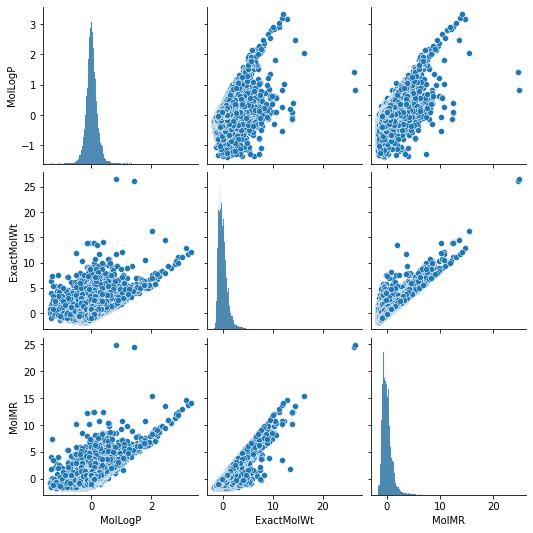

In [5]:
descrs = descrs[descrs.MolLogP>-1.38]
sns.pairplot(descrs);

In [6]:
cls = pd.read_csv('data/npmine_classes.tsv', sep='\t')
cls.head()

inchikey                         superclass  \
0  MBMQEIFVQACCCH-QBODLPLBSA-N   Phenylpropanoids and polyketides   
1  RGSFGYAAUTVSQA-UHFFFAOYSA-N                       Hydrocarbons   
2  BUGBHKTXTAQXES-UHFFFAOYSA-N    Homogeneous non-metal compounds   
3  YZXBAPSDXZZRGB-DOFZRALJSA-N    Lipids and lipid-like molecules   
4  NPDODHDPVPPRDJ-UHFFFAOYSA-N  Miscellaneous inorganic compounds   

                                   class                    subclass  
0               Macrolides and analogues                Zearalenones  
1                 Saturated hydrocarbons                Cycloalkanes  
2  Homogeneous other non-metal compounds                         NaN  
3                            Fatty Acyls  Fatty acids and conjugates  
4                       Inorganic oxides                         NaN

In [7]:
top10 = cls['superclass'].value_counts().index[:10]

In [8]:
cls.set_index('inchikey', inplace=True)
cls.head()

superclass  \
inchikey                                                         
MBMQEIFVQACCCH-QBODLPLBSA-N   Phenylpropanoids and polyketides   
RGSFGYAAUTVSQA-UHFFFAOYSA-N                       Hydrocarbons   
BUGBHKTXTAQXES-UHFFFAOYSA-N    Homogeneous non-metal compounds   
YZXBAPSDXZZRGB-DOFZRALJSA-N    Lipids and lipid-like molecules   
NPDODHDPVPPRDJ-UHFFFAOYSA-N  Miscellaneous inorganic compounds   

                                                             class  \
inchikey                                                             
MBMQEIFVQACCCH-QBODLPLBSA-N               Macrolides and analogues   
RGSFGYAAUTVSQA-UHFFFAOYSA-N                 Saturated hydrocarbons   
BUGBHKTXTAQXES-UHFFFAOYSA-N  Homogeneous other non-metal compounds   
YZXBAPSDXZZRGB-DOFZRALJSA-N                            Fatty Acyls   
NPDODHDPVPPRDJ-UHFFFAOYSA-N                       Inorganic oxides   

                                               subclass  
inchikey                                                 
MBMQEIFVQACCCH-QBODLPLBSA-N                Zearalenones  
RGSFGYAAUTVSQA-UHFFFAOYSA-N                Cycloalkanes  
BUGBHKTXTAQXES-UHFFFAOYSA-N                         NaN  
YZXBAPSDXZZRGB-DOFZRALJSA-N  Fatty acids and conjugates  
NPDODHDPVPPRDJ-UHFFFAOYSA-N                         NaN

In [9]:
descrs_cls = pd.merge(descrs, cls, left_index=True, right_index=True)
descrs_cls.head()

MolLogP  ExactMolWt     MolMR  \
MBMQEIFVQACCCH-QBODLPLBSA-N  0.078405    0.186879  0.206143   
RGSFGYAAUTVSQA-UHFFFAOYSA-N -0.032554   -1.358496 -1.170932   
OKTJSMMVPCPJKN-UHFFFAOYSA-N -0.159867   -1.720302 -1.602541   
BUGBHKTXTAQXES-UHFFFAOYSA-N -0.191340   -1.297207 -1.547921   
YZXBAPSDXZZRGB-DOFZRALJSA-N  0.258020    0.100247  0.416002   

                                                   superclass  \
MBMQEIFVQACCCH-QBODLPLBSA-N  Phenylpropanoids and polyketides   
RGSFGYAAUTVSQA-UHFFFAOYSA-N                      Hydrocarbons   
OKTJSMMVPCPJKN-UHFFFAOYSA-N                               NaN   
BUGBHKTXTAQXES-UHFFFAOYSA-N   Homogeneous non-metal compounds   
YZXBAPSDXZZRGB-DOFZRALJSA-N   Lipids and lipid-like molecules   

                                                             class  \
MBMQEIFVQACCCH-QBODLPLBSA-N               Macrolides and analogues   
RGSFGYAAUTVSQA-UHFFFAOYSA-N                 Saturated hydrocarbons   
OKTJSMMVPCPJKN-UHFFFAOYSA-N                                    NaN   
BUGBHKTXTAQXES-UHFFFAOYSA-N  Homogeneous other non-metal compounds   
YZXBAPSDXZZRGB-DOFZRALJSA-N                            Fatty Acyls   

                                               subclass  
MBMQEIFVQACCCH-QBODLPLBSA-N                Zearalenones  
RGSFGYAAUTVSQA-UHFFFAOYSA-N                Cycloalkanes  
OKTJSMMVPCPJKN-UHFFFAOYSA-N                         NaN  
BUGBHKTXTAQXES-UHFFFAOYSA-N                         NaN  
YZXBAPSDXZZRGB-DOFZRALJSA-N  Fatty acids and conjugates

In [10]:
descrs_cls.shape

(118690, 6)

In [11]:
descrs_cls[descrs_cls.superclass.isin(top10)].shape

(112503, 6)

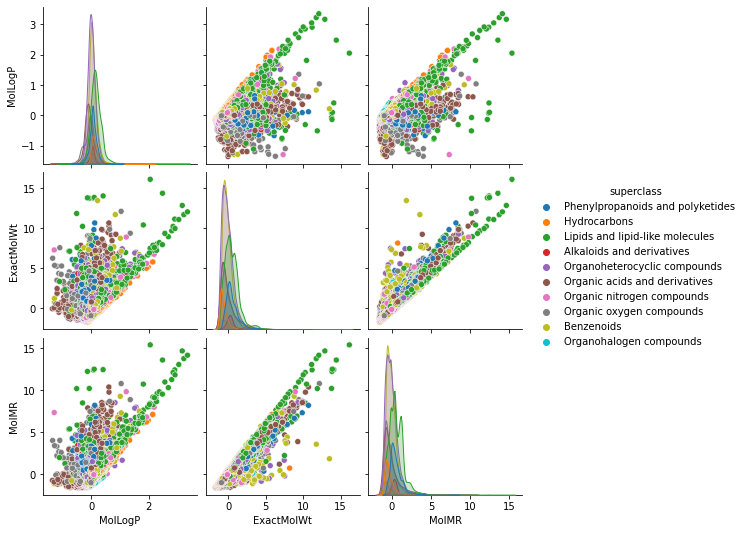

In [12]:
sns.pairplot(descrs_cls[descrs_cls.superclass.isin(top10)], hue='superclass')

In [13]:
fls = os.listdir('data/qsar/')
fls = [os.path.join('data/qsar', x) for x in fls]
imp_list = [pd.read_csv(os.path.join(x, 'feat_imp.tsv'), sep='\t', header=None) 
            for x in fls]

pd.concat(imp_list, axis=1).shape

(200, 14)

In [14]:
imp = pd.concat([imp_list[0]]+[x[1] for x in imp_list[1:]], axis=1)

imp.set_index(0, inplace=True)
fls = os.listdir('data/qsar/')
imp.columns = fls
imp.head()

588813   1296008    651838    504749   1296009   1345084  \
0                                                                               
MaxEStateIndex     0.012671  0.020809  0.007546  0.011063  0.014350  0.019488   
MinEStateIndex     0.007250  0.012830  0.012338  0.020989  0.009540  0.011830   
MaxAbsEStateIndex  0.012224  0.021206  0.007990  0.012848  0.013653  0.015742   
MinAbsEStateIndex  0.014721  0.012202  0.011855  0.007216  0.010908  0.012996   
qed                0.015551  0.012306  0.009774  0.023805  0.010694  0.013348   

                     588812  
0                            
MaxEStateIndex     0.008714  
MinEStateIndex     0.014184  
MaxAbsEStateIndex  0.009242  
MinAbsEStateIndex  0.008253  
qed                0.016762

[Text(1, 0.5, 'MaxEStateIndex'),
 Text(1, 1.5, 'MinEStateIndex'),
 Text(1, 2.5, 'MaxAbsEStateIndex'),
 Text(1, 3.5, 'MinAbsEStateIndex'),
 Text(1, 4.5, 'qed'),
 Text(1, 5.5, 'MolWt'),
 Text(1, 6.5, 'HeavyAtomMolWt'),
 Text(1, 7.5, 'ExactMolWt'),
 Text(1, 8.5, 'NumValenceElectrons'),
 Text(1, 9.5, 'NumRadicalElectrons'),
 Text(1, 10.5, 'MaxPartialCharge'),
 Text(1, 11.5, 'MinPartialCharge'),
 Text(1, 12.5, 'MaxAbsPartialCharge'),
 Text(1, 13.5, 'MinAbsPartialCharge'),
 Text(1, 14.5, 'FpDensityMorgan1'),
 Text(1, 15.5, 'FpDensityMorgan2'),
 Text(1, 16.5, 'FpDensityMorgan3'),
 Text(1, 17.5, 'BalabanJ'),
 Text(1, 18.5, 'BertzCT'),
 Text(1, 19.5, 'Chi0'),
 Text(1, 20.5, 'Chi0n'),
 Text(1, 21.5, 'Chi0v'),
 Text(1, 22.5, 'Chi1'),
 Text(1, 23.5, 'Chi1n'),
 Text(1, 24.5, 'Chi1v'),
 Text(1, 25.5, 'Chi2n'),
 Text(1, 26.5, 'Chi2v'),
 Text(1, 27.5, 'Chi3n'),
 Text(1, 28.5, 'Chi3v'),
 Text(1, 29.5, 'Chi4n'),
 Text(1, 30.5, 'Chi4v'),
 Text(1, 31.5, 'HallKierAlpha'),
 Text(1, 32.5, 'Ipc'),
 Text(1, 33

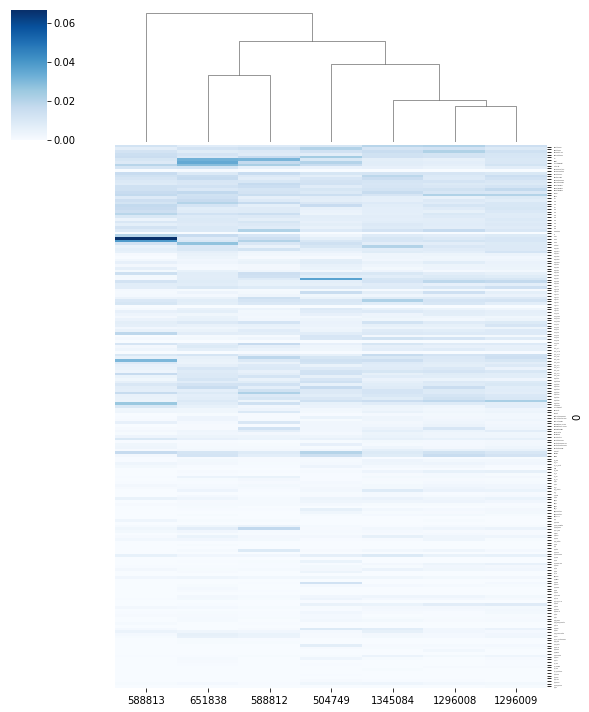

In [15]:
g = sns.clustermap(imp, metric="euclidean", method="ward", 
                   cmap="Blues", row_cluster=False, yticklabels=1)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 1)

[Text(1, 0.5, 'fr_sulfone'),
 Text(1, 1.5, 'fr_urea'),
 Text(1, 2.5, 'fr_N_O'),
 Text(1, 3.5, 'fr_sulfide'),
 Text(1, 4.5, 'fr_piperzine'),
 Text(1, 5.5, 'fr_thiophene'),
 Text(1, 6.5, 'EState_VSA11'),
 Text(1, 7.5, 'fr_term_acetylene'),
 Text(1, 8.5, 'fr_lactam'),
 Text(1, 9.5, 'fr_thiazole'),
 Text(1, 10.5, 'fr_Ar_COO'),
 Text(1, 11.5, 'fr_sulfonamd'),
 Text(1, 12.5, 'fr_isocyan'),
 Text(1, 13.5, 'fr_phos_acid'),
 Text(1, 14.5, 'fr_phos_ester'),
 Text(1, 15.5, 'fr_imide'),
 Text(1, 16.5, 'NumRadicalElectrons'),
 Text(1, 17.5, 'fr_azo'),
 Text(1, 18.5, 'fr_nitroso'),
 Text(1, 19.5, 'fr_oxazole'),
 Text(1, 20.5, 'fr_guanido'),
 Text(1, 21.5, 'fr_tetrazole'),
 Text(1, 22.5, 'Ipc'),
 Text(1, 23.5, 'fr_hdrzine'),
 Text(1, 24.5, 'fr_benzodiazepine'),
 Text(1, 25.5, 'fr_thiocyan'),
 Text(1, 26.5, 'fr_prisulfonamd'),
 Text(1, 27.5, 'fr_isothiocyan'),
 Text(1, 28.5, 'fr_diazo'),
 Text(1, 29.5, 'fr_barbitur'),
 Text(1, 30.5, 'fr_azide'),
 Text(1, 31.5, 'fr_alkyl_carbamate'),
 Text(1, 32.5, 'fr

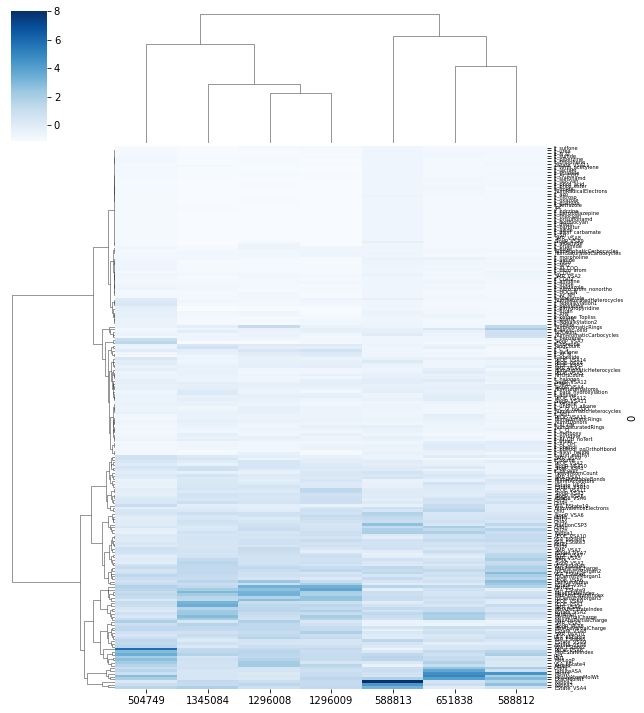

In [16]:
imp2 = imp.apply(lambda a: (a-a.mean())/a.std())

g = sns.clustermap(imp2, metric="euclidean", method="ward", 
                   cmap="Blues", yticklabels=1)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 5)

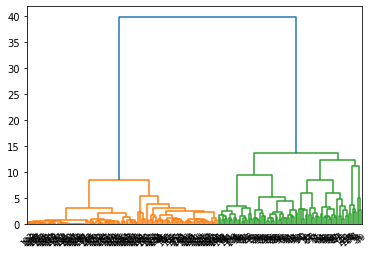

In [17]:
dend = shc.dendrogram(shc.linkage(imp2, method='ward'), 
                      leaf_rotation=45.0, 
                      leaf_font_size=8)
#plt.axhline(y=20, color='r', linestyle='--')

In [18]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
pos = cluster.fit_predict(imp2)
pos

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

[Text(1, 0.5, 'fr_sulfone'),
 Text(1, 1.5, 'fr_urea'),
 Text(1, 2.5, 'fr_N_O'),
 Text(1, 3.5, 'fr_sulfide'),
 Text(1, 4.5, 'fr_piperzine'),
 Text(1, 5.5, 'fr_thiophene'),
 Text(1, 6.5, 'EState_VSA11'),
 Text(1, 7.5, 'fr_term_acetylene'),
 Text(1, 8.5, 'fr_lactam'),
 Text(1, 9.5, 'fr_thiazole'),
 Text(1, 10.5, 'fr_Ar_COO'),
 Text(1, 11.5, 'fr_sulfonamd'),
 Text(1, 12.5, 'fr_isocyan'),
 Text(1, 13.5, 'fr_phos_acid'),
 Text(1, 14.5, 'fr_phos_ester'),
 Text(1, 15.5, 'fr_imide'),
 Text(1, 16.5, 'NumRadicalElectrons'),
 Text(1, 17.5, 'fr_azo'),
 Text(1, 18.5, 'fr_nitroso'),
 Text(1, 19.5, 'fr_oxazole'),
 Text(1, 20.5, 'fr_guanido'),
 Text(1, 21.5, 'fr_tetrazole'),
 Text(1, 22.5, 'Ipc'),
 Text(1, 23.5, 'fr_hdrzine'),
 Text(1, 24.5, 'fr_benzodiazepine'),
 Text(1, 25.5, 'fr_thiocyan'),
 Text(1, 26.5, 'fr_prisulfonamd'),
 Text(1, 27.5, 'fr_isothiocyan'),
 Text(1, 28.5, 'fr_diazo'),
 Text(1, 29.5, 'fr_barbitur'),
 Text(1, 30.5, 'fr_azide'),
 Text(1, 31.5, 'fr_alkyl_carbamate'),
 Text(1, 32.5, 'fr

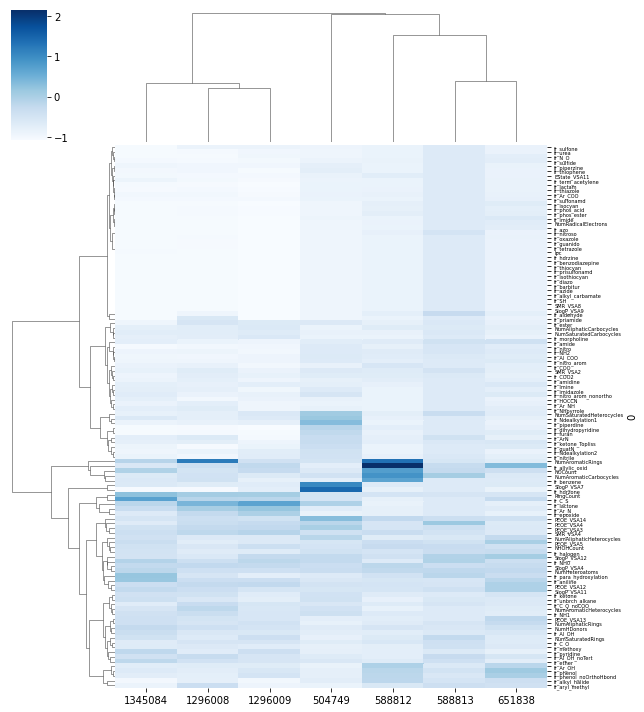

In [19]:
g = sns.clustermap(imp2.iloc[pos==1,:], metric="euclidean", method="ward", 
                   cmap="Blues", yticklabels=1)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 5)

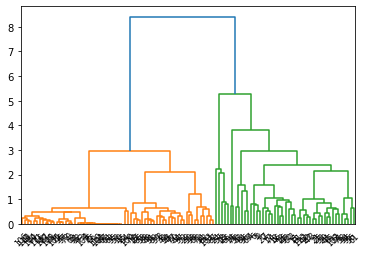

In [20]:
imp3 = imp2.iloc[pos==1,:]

dend = shc.dendrogram(shc.linkage(imp3, method='ward'), 
                      leaf_rotation=45.0, 
                      leaf_font_size=8)

In [21]:
pos2 = cluster.fit_predict(imp3)

[Text(1, 0.5, 'NumAromaticRings'),
 Text(1, 1.5, 'fr_allylic_oxid'),
 Text(1, 2.5, 'NOCount'),
 Text(1, 3.5, 'NumAromaticCarbocycles'),
 Text(1, 4.5, 'fr_benzene'),
 Text(1, 5.5, 'SlogP_VSA7'),
 Text(1, 6.5, 'fr_hdrzone'),
 Text(1, 7.5, 'RingCount'),
 Text(1, 8.5, 'fr_C_S'),
 Text(1, 9.5, 'fr_lactone'),
 Text(1, 10.5, 'fr_Ar_N'),
 Text(1, 11.5, 'fr_epoxide'),
 Text(1, 12.5, 'PEOE_VSA14'),
 Text(1, 13.5, 'PEOE_VSA4'),
 Text(1, 14.5, 'PEOE_VSA3'),
 Text(1, 15.5, 'SMR_VSA4'),
 Text(1, 16.5, 'NumAliphaticHeterocycles'),
 Text(1, 17.5, 'PEOE_VSA5'),
 Text(1, 18.5, 'NHOHCount'),
 Text(1, 19.5, 'fr_halogen'),
 Text(1, 20.5, 'SlogP_VSA12'),
 Text(1, 21.5, 'fr_NH0'),
 Text(1, 22.5, 'SlogP_VSA4'),
 Text(1, 23.5, 'NumHeteroatoms'),
 Text(1, 24.5, 'fr_para_hydroxylation'),
 Text(1, 25.5, 'fr_aniline'),
 Text(1, 26.5, 'PEOE_VSA12'),
 Text(1, 27.5, 'SlogP_VSA11'),
 Text(1, 28.5, 'fr_ketone'),
 Text(1, 29.5, 'fr_unbrch_alkane'),
 Text(1, 30.5, 'fr_C_O_noCOO'),
 Text(1, 31.5, 'NumAromaticHeterocycles'

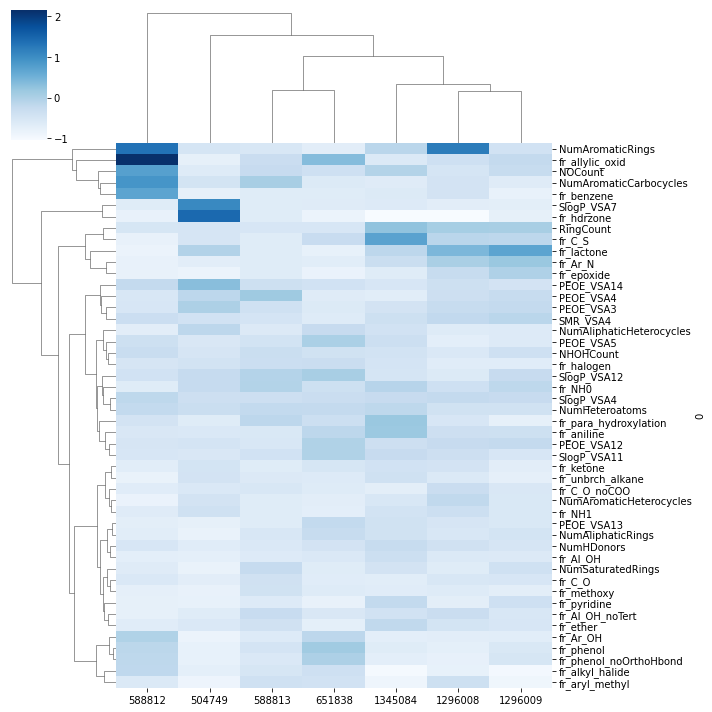

In [22]:
g = sns.clustermap(imp3.iloc[pos2==0,:], metric="euclidean", method="ward", 
                   cmap="Blues", yticklabels=1)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 10)

In [23]:
nms = ['NumAromaticRings', 'fr_allylic_oxid', 'NOCount',
       'NumAromaticCarbocycles', 'fr_benzene', 'SlogP_VSA7']

calc = MoleculeDescriptors.MolecularDescriptorCalculator(nms)
descrs = [calc.CalcDescriptors(x) for x in mols]
descrs = pd.DataFrame(descrs, columns=nms)

descrs.index = comp['standardInChIKey']

descrs.head()

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 24, in _CountMatches
    return len(mol.GetSubstructMatches(patt, uniquify=unique))
AttributeError: 'NoneType' object has no attribute 'GetSubstructMatches'
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Lipinski.py", line 90, in <lambda>
    _fn = lambda x, y=_cfn: y(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(NoneType)
did not match C++ signature:
    CalcNumAromaticRings(RDKit::ROMol mol)
Traceback (most recent call last):
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/rdkit/Chem/Fragments.py", line 46, in <lambda>
    fn = lambda mol, countUnique=True, pattern=patt: _CountMatches(mol, pattern, unique=countUnique)
  File "/home/rsilva/mini

NumAromaticRings  fr_allylic_oxid  NOCount  \
standardInChIKey                                                          
MBMQEIFVQACCCH-QBODLPLBSA-N                 1                1        5   
RGSFGYAAUTVSQA-UHFFFAOYSA-N                 0                0        0   
OKTJSMMVPCPJKN-UHFFFAOYSA-N                 0                0        0   
BUGBHKTXTAQXES-UHFFFAOYSA-N                 0                0        0   
YZXBAPSDXZZRGB-DOFZRALJSA-N                 0                8        2   

                             NumAromaticCarbocycles  fr_benzene  SlogP_VSA7  
standardInChIKey                                                             
MBMQEIFVQACCCH-QBODLPLBSA-N                       1           1         0.0  
RGSFGYAAUTVSQA-UHFFFAOYSA-N                       0           0         0.0  
OKTJSMMVPCPJKN-UHFFFAOYSA-N                       0           0         0.0  
BUGBHKTXTAQXES-UHFFFAOYSA-N                       0           0         0.0  
YZXBAPSDXZZRGB-DOFZRALJSA-N                       0           0         0.0

In [24]:
descrs = pd.read_csv('data/npaltlas_descrs.tsv', sep='\t')
descrs.describe()

MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
count    29006.000000    29006.000000       29006.000000       29006.000000   
mean        12.298150       -1.211831          12.298150           0.073014   
std          4.315538        3.982639           4.315538           3.913222   
min       -666.000000     -666.000000        -666.000000        -666.000000   
25%         11.464440       -1.615146          11.464440           0.021178   
50%         12.470874       -1.131760          12.470874           0.054111   
75%         13.383380       -0.700574          13.383380           0.117775   
max         17.947984        1.833333          17.947984           1.833333   

                qed         MolWt  HeavyAtomMolWt    ExactMolWt  \
count  29006.000000  29006.000000    29006.000000  29006.000000   
mean       0.384502    492.561679      456.842143    492.168985   
std        3.920603    305.266382      282.793145    305.050988   
min     -666.000000   -666.000000     -666.000000   -666.000000   
25%        0.192812    294.303000      274.167000    294.110338   
50%        0.416018    413.437000      384.211000    413.145441   
75%        0.616607    570.635000      530.346000    570.246497   
max        0.947223   5033.832000     4654.824000   5030.732576   

       NumValenceElectrons  NumRadicalElectrons  ...    fr_sulfide  \
count          29006.00000         29006.000000  ...  29006.000000   
mean             191.62194            -0.022340  ...      0.010343   
std              120.06134             3.910697  ...      3.917767   
min             -666.00000          -666.000000  ...   -666.000000   
25%              114.00000             0.000000  ...      0.000000   
50%              160.00000             0.000000  ...      0.000000   
75%              222.00000             0.000000  ...      0.000000   
max             1990.00000             3.000000  ...      5.000000   

       fr_sulfonamd    fr_sulfone  fr_term_acetylene  fr_tetrazole  \
count  29006.000000  29006.000000       29006.000000  29006.000000   
mean      -0.022788     -0.022582          -0.019513     -0.022961   
std        3.910505      3.910533           3.910950      3.910482   
min     -666.000000   -666.000000        -666.000000   -666.000000   
25%        0.000000      0.000000           0.000000      0.000000   
50%        0.000000      0.000000           0.000000      0.000000   
75%        0.000000      0.000000           0.000000      0.000000   
max        1.000000      1.000000           2.000000      0.000000   

        fr_thiazole   fr_thiocyan  fr_thiophene  fr_unbrch_alkane  \
count  29006.000000  29006.000000  29006.000000      29006.000000   
mean       0.005206     -0.022961     -0.022685          0.739950   
std        3.921283      3.910482      3.910519          4.732767   
min     -666.000000   -666.000000   -666.000000       -666.000000   
25%        0.000000      0.000000      0.000000          0.000000   
50%        0.000000      0.000000      0.000000          0.000000   
75%        0.000000      0.000000      0.000000          0.000000   
max        6.000000      0.000000      1.000000         50.000000   

            fr_urea  
count  29006.000000  
mean      -0.022271  
std        3.910574  
min     -666.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 200 columns]

In [26]:
preds = pd.read_csv('data/figure_drafts/predicted_activity.tsv', sep='\t')
preds.head()

AID             standardInChIKey  \
0  504749  YCOZIPAWZNQLMR-UHFFFAOYSA-N   
1  504749  DCAYPVUWAIABOU-UHFFFAOYSA-N   
2  504749  BCGWQEUPMDMJNV-UHFFFAOYSA-N   
3  504749  YTJSFYQNRXLOIC-UHFFFAOYSA-N   
4  504749  POOSGDOYLQNASK-UHFFFAOYSA-N   

                                       standardInChI  pubchem  \
0  InChI=1S/C15H32/c1-3-5-7-9-11-13-15-14-12-10-8...    12391   
1  InChI=1S/C16H34/c1-3-5-7-9-11-13-15-16-14-12-1...    11006   
2  InChI=1S/C19H24N2/c1-20(2)14-7-15-21-18-10-5-3...     3696   
3  InChI=1S/C18H40Si/c1-2-3-4-5-6-7-8-9-10-11-12-...    87730   
4  InChI=1S/C24H50/c1-3-5-7-9-11-13-15-17-19-21-2...    12592   

  Bioactivity Outcome  degree  connected_component  eigenvector_centrality  \
0                 NaN     539                    0            3.515724e-02   
1                 NaN     606                    0            4.700461e-02   
2         Unspecified      14                    0            3.523372e-26   
3                 NaN     484                    0            5.406565e-02   
4                 NaN     512                    0            4.290210e-02   

   betweenness predicted_activity  
0     0.000409           Inactive  
1     0.001487           Inactive  
2     0.000344           Inactive  
3     0.000122           Inactive  
4     0.000385           Inactive

In [31]:
preds_active = preds[preds.predicted_activity=='Active']
preds_active.standardInChIKey.value_counts()

SFVFIFLLYFPGHH-UHFFFAOYSA-M    4
QPERNWXRUSFVPU-UHFFFAOYSA-M    3
YMKDRGPMQRFJGP-UHFFFAOYSA-M    3
WJLUBOLDZCQZEV-UHFFFAOYSA-M    3
FVPAHLYNDPYREK-UHFFFAOYSA-N    3
                              ..
JBIROUFYLSSYDX-UHFFFAOYSA-M    1
ZGAQJYYKGWWEEM-UHFFFAOYSA-N    1
PLMFYJJFUUUCRZ-UHFFFAOYSA-M    1
RGBJYTMHKCMMOJ-UHFFFAOYSA-M    1
AZVSIMOMNHTWRV-XUCMERPOSA-N    1
Name: standardInChIKey, Length: 102, dtype: int64

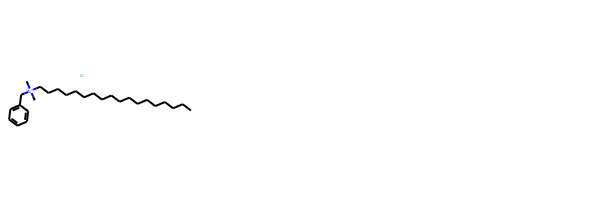

In [37]:
inchi = preds_active.loc[preds_active.standardInChIKey=='SFVFIFLLYFPGHH-UHFFFAOYSA-M', 'standardInChI'][98]
mol = Chem.MolFromInchi(inchi)
Chem.Draw.MolsToGridImage([mol])

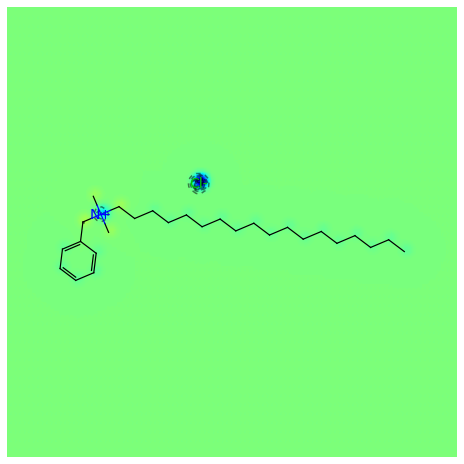

In [39]:
AllChem.ComputeGasteigerCharges(mol)
contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)

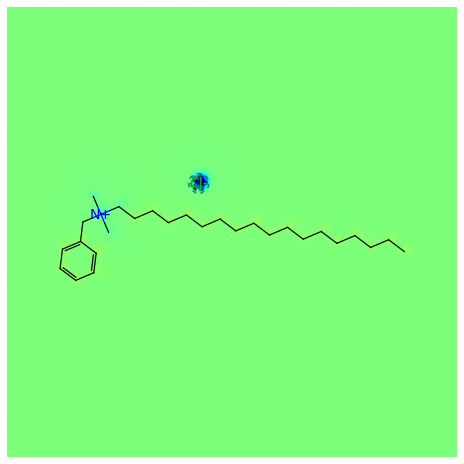

In [42]:
contribs = rdMolDescriptors._CalcCrippenContribs(mol)
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol,[x for x,y in contribs], colorMap='jet', contourLines=10)

In [25]:
dstat = descrs.describe()
std_error = dstat.apply(lambda a: a['std']/a['mean'])
std_error

MaxEStateIndex         0.350910
MinEStateIndex        -3.286464
MaxAbsEStateIndex      0.350910
MinAbsEStateIndex     53.595599
qed                   10.196572
                        ...    
fr_thiazole          753.249883
fr_thiocyan         -170.311479
fr_thiophene        -172.383761
fr_unbrch_alkane       6.396060
fr_urea             -175.588418
Length: 200, dtype: float64

In [5]:
descrs[['fr_thiazole', 'fr_thiocyan', 'fr_urea']].head()

fr_thiazole  fr_thiocyan  fr_urea
0            0            0        0
1            0            0        0
2            0            0        0
3            0            0        0
4            0            0        0

In [8]:
frsel = descrs.apply(lambda a: len(a.value_counts()))

In [12]:
frsel[frsel>2000].index.values

array(['npaid', 'MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt',
       'ExactMolWt', 'MaxPartialCharge', 'MinPartialCharge',
       'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'BalabanJ', 'BertzCT',
       'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n',
       'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha',
       'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1',
       'PEOE_VSA10', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9',
       'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA5', 'SMR_VSA7', 'SlogP_VSA2',
       'SlogP_VSA5', 'SlogP_VSA6', 'TPSA', 'EState_VSA1', 'EState_VSA2',
       'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA8',
       'VSA_EState1', 'VSA_EState10', 'VSA_EState2', 'VSA_EState3',
       'VSA_EState4', 'VSA_EState5', 'VSA_EState6', 'VSA_EState7',
       'VSA_EState8', 'VSA_EState9',

In [13]:
descrs[frsel[frsel>2000].index.values].shape

(29006, 68)

In [14]:
descrs = descrs[frsel[frsel>2000].index.values]
dstat = descrs.describe()
std_error = dstat.apply(lambda a: a['std']/a['mean'])
std_error

MaxEStateIndex        0.350910
MinEStateIndex       -3.286464
MaxAbsEStateIndex     0.350910
MinAbsEStateIndex    53.595599
qed                  10.196572
                       ...    
VSA_EState7           2.613513
VSA_EState8           1.061444
VSA_EState9           5.646588
MolLogP               1.446916
MolMR                 0.620315
Length: 67, dtype: float64

In [24]:
std_error = std_error.abs().sort_values(ascending=False)
std_error[:10]

Ipc                    120.426326
MinAbsEStateIndex       53.595599
MinAbsPartialCharge     15.662366
MaxPartialCharge        15.605578
qed                     10.196572
MaxAbsPartialCharge      8.645969
MinPartialCharge         7.854830
VSA_EState10             7.428767
VSA_EState4              5.925588
VSA_EState9              5.646588
dtype: float64

In [34]:
corr = descrs[std_error[:20].index.values].corr()

<AxesSubplot:>

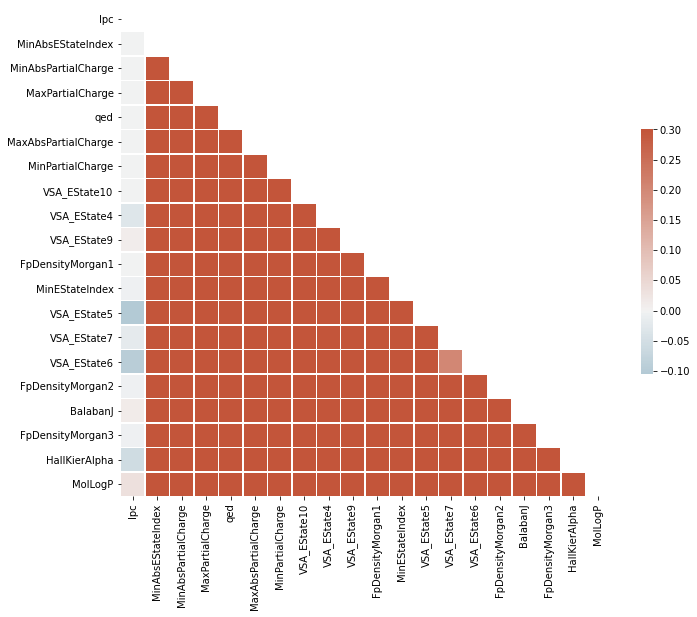

In [35]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [36]:
cls = pd.read_csv('data/np_atlas_2019_02.tsv', sep='\t')
cls.set_index('Identifier', inplace=True)
cls.head()

MonoisotopicMass  \
Identifier                     
NPA000001         359.267173   
NPA000002         416.219889   
NPA000003         502.118337   
NPA000004         325.069870   
NPA000005         392.219889   

                                                        InChI  \
Identifier                                                      
NPA000001   InChI=1S/C19H37NO5/c1-7-13(3)16(12-21)20-17(23...   
NPA000002   InChI=1S/C24H32O6/c1-14(2)18-13-24(5)16(4)21(1...   
NPA000003   InChI=1S/C18H22N4O13/c1-31-9-10(11(13(19)26)34...   
NPA000004   InChI=1S/C16H11N3O5/c20-12-7-6-10(8-11(12)19(2...   
NPA000005   InChI=1S/C22H32O6/c1-18(10-23)6-3-7-19(2)13-9-...   

                                                       SMILES   InChIKey2  \
Identifier                                                                  
NPA000001   CC[C@@H](O)C[C@H](C)[C@H](O)[C@](C)(OC)\C=C\C(...  HWTFSWDCSA   
NPA000002   C[C@@H]([C@@H](O)\C=C\C=C\C(O)=O)C(=O)O[C@@H]1...  DHCANEKFSA   
NPA000003   COC1C(OC(N)=O)C(OC1C(OC1OC(=CC(O)C1O)C(O)=O)C(...  UHFFFAOYSA   
NPA000004   O\N=C1/NC(=O)C(=C1C1=CC=C(O)C(=C1)[N+]([O-])=O...  UHFFFAOYSA   
NPA000005   C[C@@]1(CO)CCC[C@]2(C)[C@H]3C[C@@]45OC4[C@H](O...  WRXMSMRBSA   

                 InChIKey1 MolecularFormula       kingdom_name  \
Identifier                                                       
NPA000001   BZLIDAVUQDTJQF        C19H37NO5  Organic compounds   
NPA000002   MMWCHIIGAIJQMV         C24H32O6                NaN   
NPA000003   RNRCUOCMUNIOMZ      C18H22N4O13  Organic compounds   
NPA000004   UVCCQAFMWBXIIY       C16H11N3O5  Organic compounds   
NPA000005   OYLVOLOSQHRPLK         C22H32O6  Organic compounds   

                             superclass_name              class_name  \
Identifier                                                             
NPA000001    Lipids and lipid-like molecules             Fatty Acyls   
NPA000002                                NaN                     NaN   
NPA000003           Organic oxygen compounds  Organooxygen compounds   
NPA000004   Phenylpropanoids and polyketides               Stilbenes   
NPA000005    Lipids and lipid-like molecules           Prenol lipids   

                                        subclass_name  
Identifier                                             
NPA000001                                Fatty amides  
NPA000002                                         NaN  
NPA000003   Carbohydrates and carbohydrate conjugates  
NPA000004                                         NaN  
NPA000005                                Diterpenoids

In [40]:
descrs.set_index('npaid', inplace=True)
top10 = cls['superclass_name'].value_counts().index[:10]
descrs_cls = pd.merge(descrs, cls, left_index=True, right_index=True)
descrs_cls = descrs_cls[descrs_cls.superclass_name.isin(top10)]
descrs_cls.shape

(16531, 77)

In [41]:
std_error[:20].index.tolist()

['Ipc',
 'MinAbsEStateIndex',
 'MinAbsPartialCharge',
 'MaxPartialCharge',
 'qed',
 'MaxAbsPartialCharge',
 'MinPartialCharge',
 'VSA_EState10',
 'VSA_EState4',
 'VSA_EState9',
 'FpDensityMorgan1',
 'MinEStateIndex',
 'VSA_EState5',
 'VSA_EState7',
 'VSA_EState6',
 'FpDensityMorgan2',
 'BalabanJ',
 'FpDensityMorgan3',
 'HallKierAlpha',
 'MolLogP']

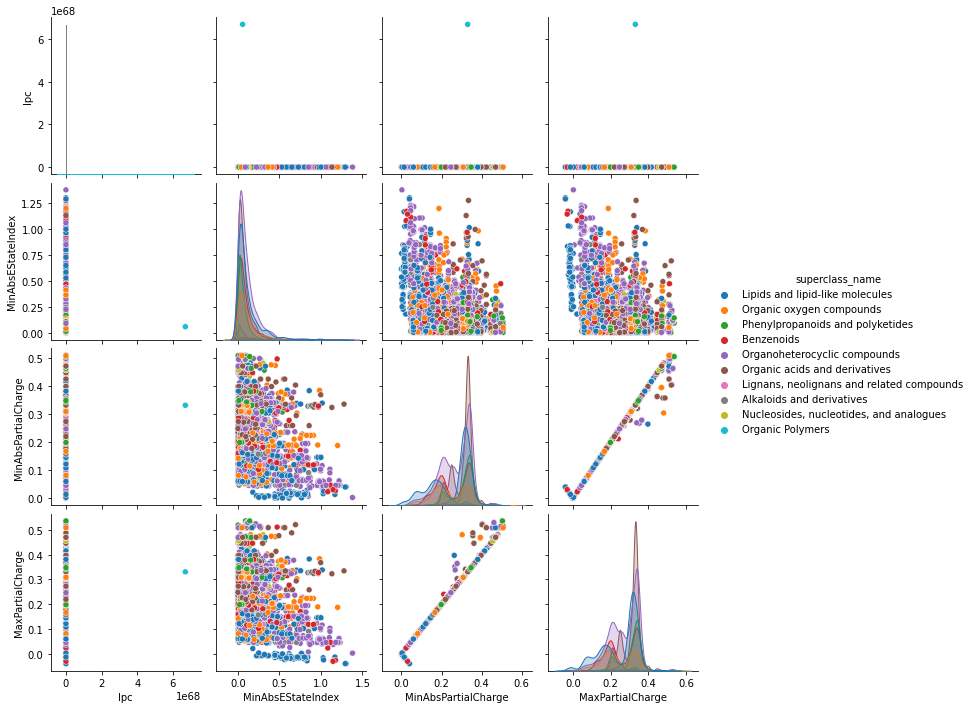

In [43]:
sns.pairplot(descrs_cls[std_error[:4].index.tolist()+['superclass_name']], hue='superclass_name')

/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


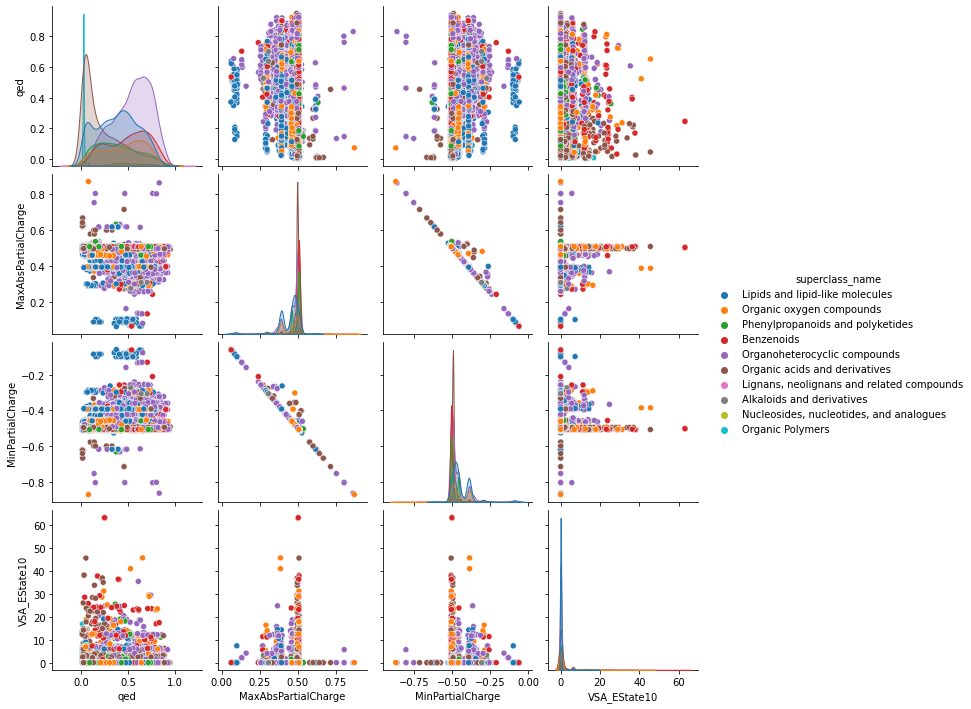

In [44]:
sns.pairplot(descrs_cls[std_error[4:8].index.tolist()+['superclass_name']], hue='superclass_name')

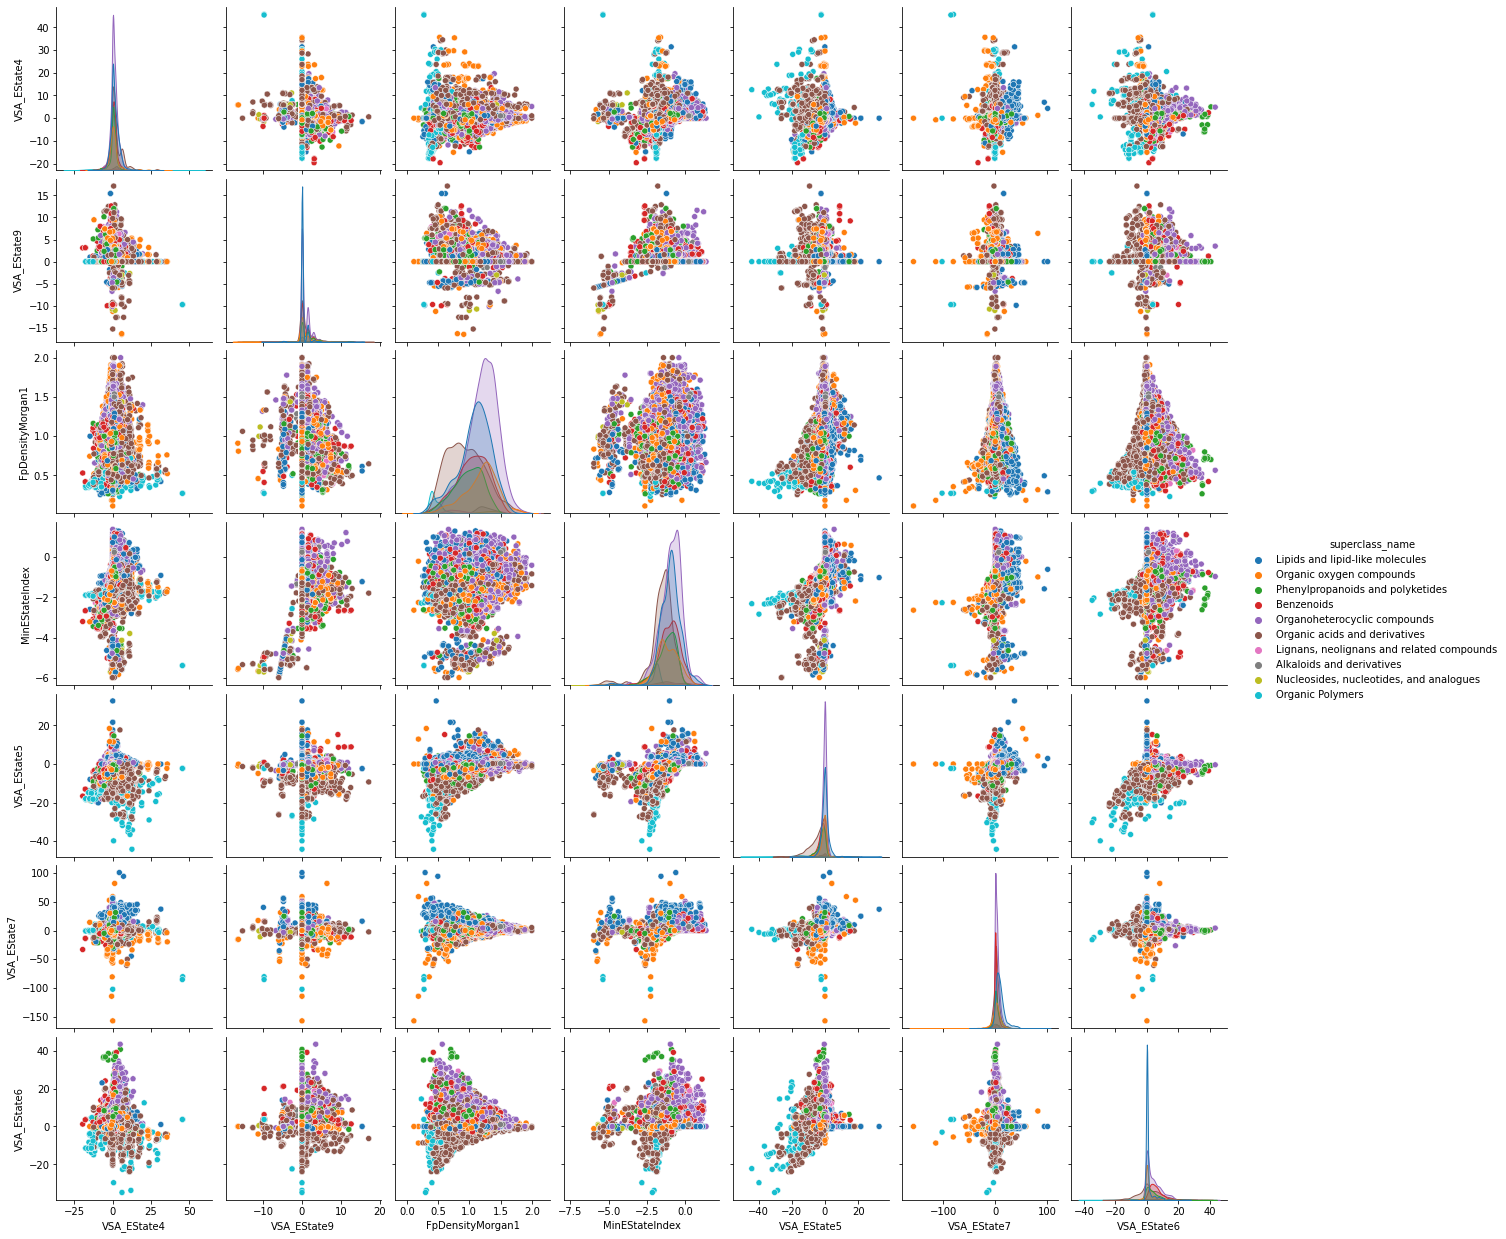

In [45]:
sns.pairplot(descrs_cls[std_error[8:15].index.tolist()+['superclass_name']], hue='superclass_name')

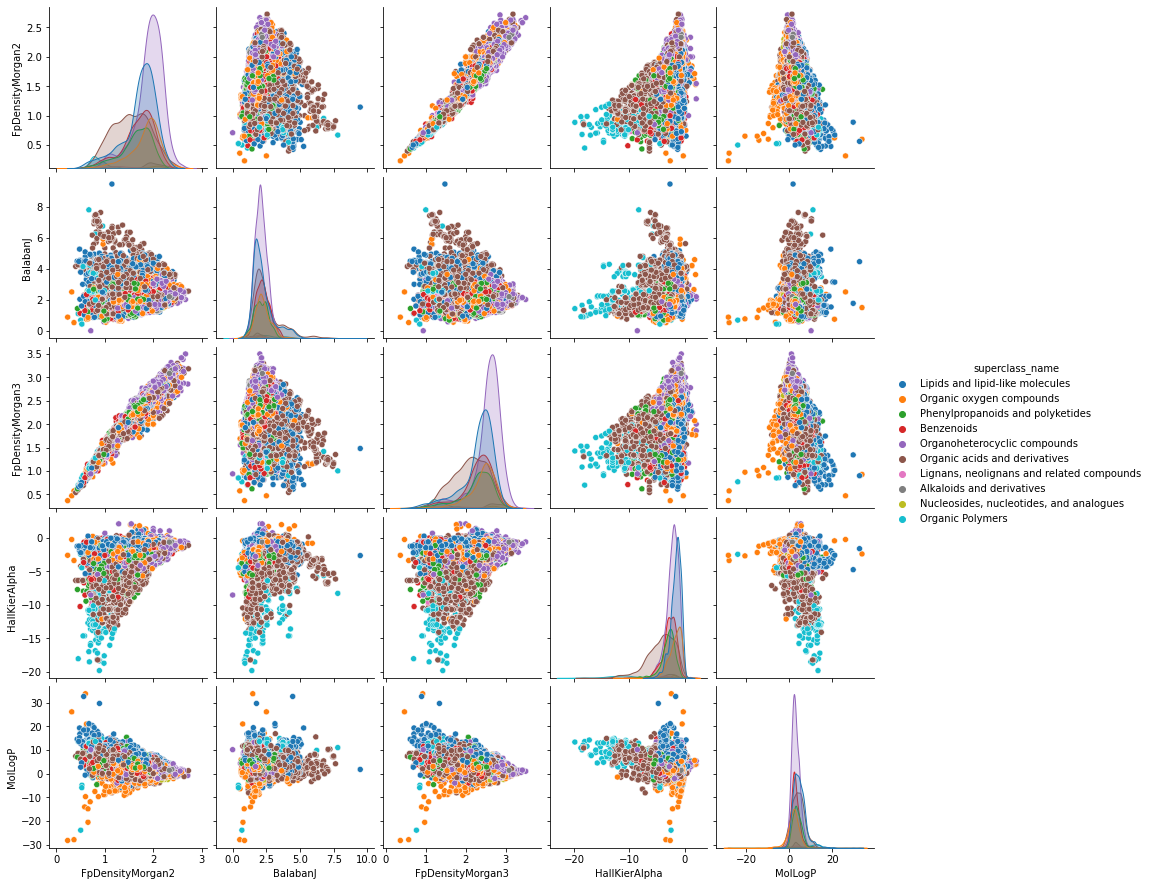

In [46]:
sns.pairplot(descrs_cls[std_error[15:20].index.tolist()+['superclass_name']], hue='superclass_name')

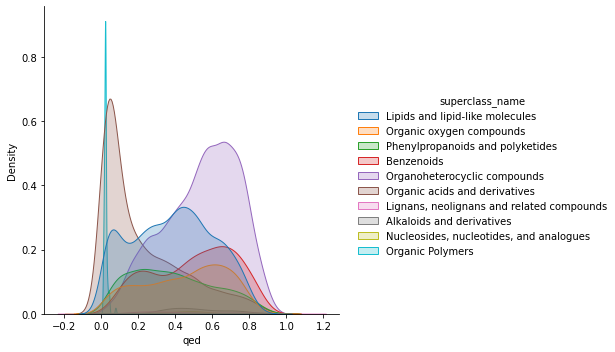

In [48]:
sns.displot(descrs_cls[['qed', 'superclass_name']], 
            x="qed", hue="superclass_name", kind="kde", 
            fill=True)

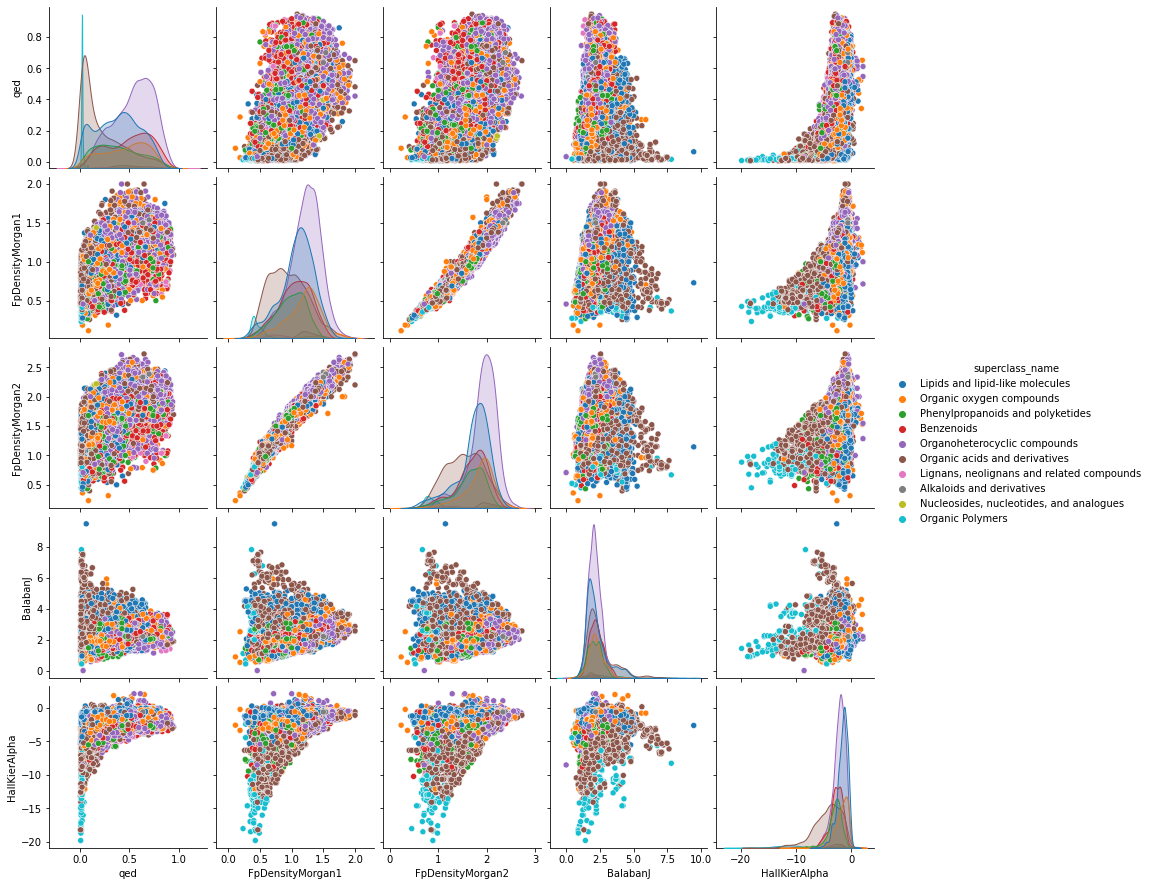

In [51]:
sns.pairplot(descrs_cls[['qed', 'FpDensityMorgan1', 
                        'FpDensityMorgan2', 'BalabanJ',
                         'HallKierAlpha', 'superclass_name']], 
            hue="superclass_name")

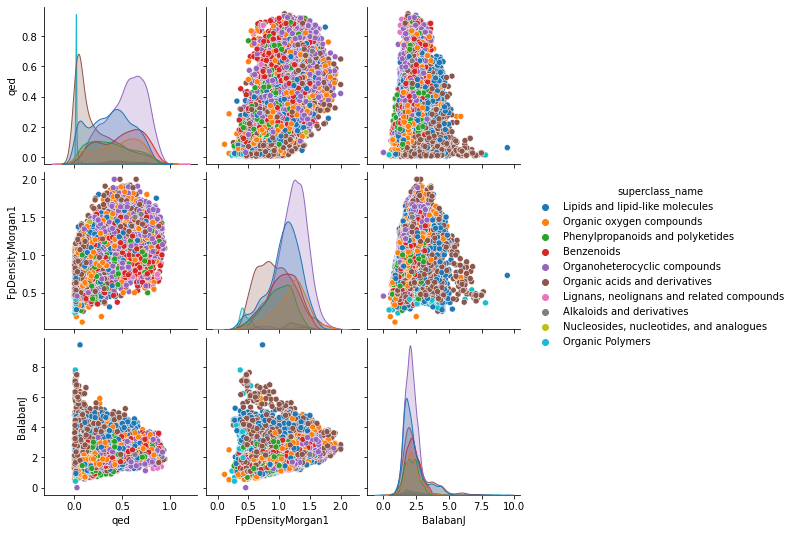

In [52]:
sns.pairplot(descrs_cls[['qed', 'FpDensityMorgan1', 
                         'BalabanJ','superclass_name']], 
            hue="superclass_name")